# GMM clustering with PCA

### Imports
* Pandas and numpy for Data handling
* Matplotlib for Vizualisation
* PCA - Principal Component Analysis
* GMM - Gaussian Mixture Model
* Adjusted Rand Score (ARI) - Clustering Metrics

Log-likely hood function to get the Log-likely hood of the model

In [1]:
#Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

#Log-Likely Hood
def Log_Likely_Hood(data, rng):
  n_components_range = rng
  models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(data) for n in n_components_range]
  log_likelihoods = [model.score(data) for model in models]
  return log_likelihoods

###  Data Handling

In [2]:
#Loading the data
bc_ds=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
bc_ds=bc_ds.drop('id',axis=1)

#Encode the labels
bc_ds["diagnosis"] = bc_ds["diagnosis"].map({'M': 1, 'B': 0})

#Train data 
x=bc_ds.loc[:, bc_ds.columns != 'diagnosis']
y=bc_ds["diagnosis"]

### GMM without PCA
* The accuracy is very low (12.23%)
* The high dimension of the train data has caused the model to not provide proper clusters

In [3]:
#GMM
GMM = GaussianMixture(n_components=2, random_state=42).fit(x)

#Prediction
y_pred = GMM.fit_predict(x)

#Metrics
accuracy_pre_pca=(y==y_pred).sum()/len(y)*100
ari_pre_pca=adjusted_rand_score(y, y_pred)

#Log-Likely Hood
LL_pre_pca=Log_Likely_Hood(x, range(1, 5))

### GMM with PCA
* PCA is used to reduce the dimension of the train data
* PCA reusultant data is fed to GMM
* Accuracy increases to ~89%

In [4]:
#Scaling the Data before PCA
scaler = StandardScaler()
x_Sca = scaler.fit_transform(x)
x_Sca = scaler.fit_transform(x)

#PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_Sca)
x_pca = pca.fit_transform(x_Sca)

#GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(x_pca)

#Prediction
y_pred = gmm.predict(x_pca)

#Metrics
ari_post_pca=adjusted_rand_score(y, y_pred)
accuracy_post_pca=(y==y_pred).sum()/len(y)*100

#Log-Likely Hood
LL_post_pca=Log_Likely_Hood(x_pca, range(1, 5))

### Comapring the Log-likely hood
Clearly the log-likely hood after PCA has a better bent at two suggesting that there are two clusters. The log-likely before PCA is close to a straight line showing the bad performance of the Pre-PCA-GMM Model

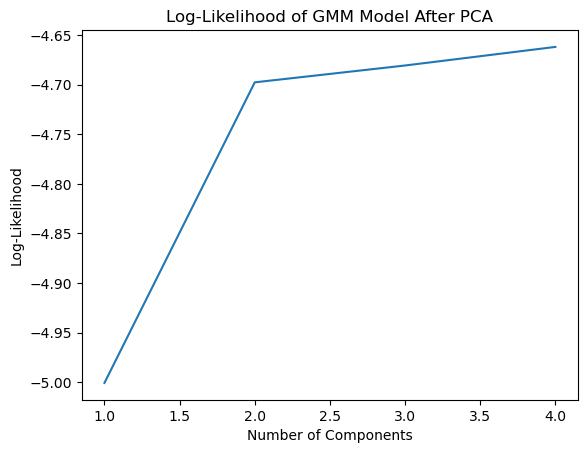

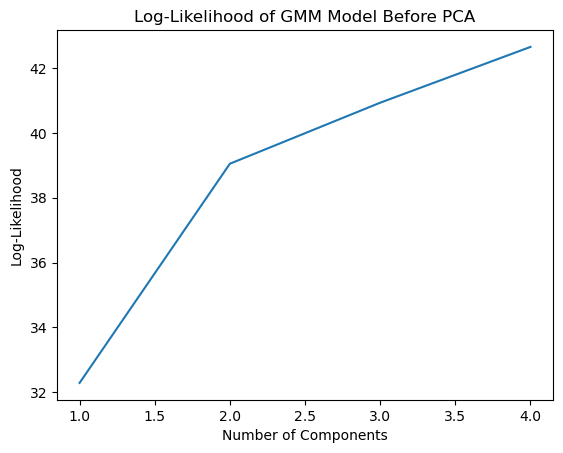

In [5]:
# Plot the log-likelihood graph PRE-PCA
plt.plot(range(1, 5), LL_post_pca)
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood of GMM Model After PCA')
plt.show()

# Plot the log-likelihood graph POST-PCA
plt.plot(range(1, 5), LL_pre_pca)
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood of GMM Model Before PCA')
plt.show()